In [3]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [37]:
#load data
from keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [38]:
xtrain.shape

(60000, 28, 28)

In [39]:
#preprocess the data
xtrain=xtrain.reshape(60000,28,28,1)
xtest=xtest.reshape(10000,28,28,1)
xtrain=xtrain/256
xtest=xtest/256

In [40]:
xtrain.shape

(60000, 28, 28, 1)

In [41]:
ytrain=np_utils.to_categorical(ytrain)
ytest=np_utils.to_categorical(ytest)

In [42]:
label_count=ytrain.shape[1]

In [47]:
def return_model():
    #creating model
    model=Sequential()
    model.add(Convolution2D(32,(5,5),border_mode='valid',input_shape=(28,28,1),activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(label_count,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [48]:
model=return_model()

C:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), input_shape=(28, 28, 1..., activation="relu", padding="valid")`
  after removing the cwd from sys.path.


In [49]:
valuations=model.fit(xtrain[:50000],ytrain[:50000],validation_data=(xtrain[50000:],ytrain[50000:]), epochs=10, batch_size=200,
verbose=2)


Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 38s - loss: 0.2646 - accuracy: 0.9260 - val_loss: 0.0895 - val_accuracy: 0.9751
Epoch 2/10
 - 39s - loss: 0.0784 - accuracy: 0.9764 - val_loss: 0.0667 - val_accuracy: 0.9818
Epoch 3/10
 - 36s - loss: 0.0552 - accuracy: 0.9830 - val_loss: 0.0532 - val_accuracy: 0.9846
Epoch 4/10
 - 33s - loss: 0.0428 - accuracy: 0.9871 - val_loss: 0.0484 - val_accuracy: 0.9870
Epoch 5/10
 - 26s - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0519 - val_accuracy: 0.9852
Epoch 6/10
 - 26s - loss: 0.0291 - accuracy: 0.9910 - val_loss: 0.0506 - val_accuracy: 0.9858
Epoch 7/10
 - 24s - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.0457 - val_accuracy: 0.9870
Epoch 8/10
 - 24s - loss: 0.0213 - accuracy: 0.9935 - val_loss: 0.0431 - val_accuracy: 0.9890
Epoch 9/10
 - 24s - loss: 0.0178 - accuracy: 0.9944 - val_loss: 0.0439 - val_accuracy: 0.9885
Epoch 10/10
 - 26s - loss: 0.0149 - accuracy: 0.9952 - v

In [85]:
ypred=model.predict_classes(xtest)

In [110]:
(ypred[0])

7

In [87]:
from matplotlib import pyplot as plt

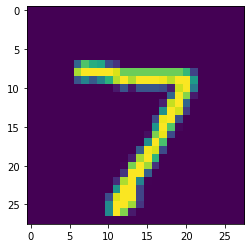

In [111]:
plt.imshow(xtest[0].reshape(28,28))

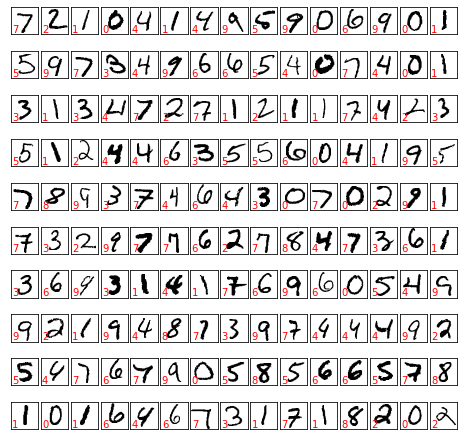

In [109]:
#import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 15, figsize=(8,8),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(xtest[i].reshape(28,28), cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(ypred[i]),transform=ax.transAxes, color='red')